In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('dataset.csv').drop('index', axis=1)

print(data.head())
print(data.tail())



                    City       Date  Card Type Exp Type Gender  Amount
0           Delhi, India  29-Oct-14       Gold    Bills      F   82475
1  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   32555
2       Bengaluru, India  27-Aug-14     Silver    Bills      F  101738
3  Greater Mumbai, India  12-Apr-14  Signature    Bills      F  123424
4       Bengaluru, India   5-May-15       Gold    Bills      F  171574
                   City       Date  Card Type Exp Type Gender  Amount
26047    Kolkata, India  22-Jun-14     Silver   Travel      F  128191
26048       Pune, India   3-Aug-14  Signature   Travel      M  246316
26049  Hyderabad, India  16-Jan-15     Silver   Travel      M  265019
26050     Kanpur, India  14-Sep-14     Silver   Travel      M   88174
26051  Hyderabad, India  19-Oct-13  Signature    Bills      M  184410


In [3]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Extract features from Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop original Date column
data = data.drop(columns=['Date'])
print(data.head())

                    City  Card Type Exp Type Gender  Amount  Year  Month  Day
0           Delhi, India       Gold    Bills      F   82475  2014     10   29
1  Greater Mumbai, India   Platinum    Bills      F   32555  2014      8   22
2       Bengaluru, India     Silver    Bills      F  101738  2014      8   27
3  Greater Mumbai, India  Signature    Bills      F  123424  2014      4   12
4       Bengaluru, India       Gold    Bills      F  171574  2015      5    5


In [4]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['City', 'Card Type', 'Exp Type', 'Gender']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

print(data.tail())

       City  Card Type  Exp Type  Gender  Amount  Year  Month  Day
26047   267          3         5       0  128191  2014      6   22
26048   584          2         5       1  246316  2014      8    3
26049   193          3         5       1  265019  2015      1   16
26050   237          3         5       1   88174  2014      9   14
26051   193          2         0       1  184410  2013     10   19


In [5]:
# Split data into features and target variable
X = data.drop(columns=['Amount'])
y = data['Amount']

print(X)
print(y)

       City  Card Type  Exp Type  Gender  Year  Month  Day
0       126          0         0       0  2014     10   29
1       170          1         0       0  2014      8   22
2        71          3         0       0  2014      8   27
3       170          2         0       0  2014      4   12
4        71          0         0       0  2015      5    5
...     ...        ...       ...     ...   ...    ...  ...
26047   267          3         5       0  2014      6   22
26048   584          2         5       1  2014      8    3
26049   193          3         5       1  2015      1   16
26050   237          3         5       1  2014      9   14
26051   193          2         0       1  2013     10   19

[26052 rows x 7 columns]
0         82475
1         32555
2        101738
3        123424
4        171574
          ...  
26047    128191
26048    246316
26049    265019
26050     88174
26051    184410
Name: Amount, Length: 26052, dtype: int64


In [6]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

print(X_scaled)
print(y_scaled)

[[-0.47067387 -1.35973352 -1.42030018 ... -0.14883968  0.97496339
   1.52775611]
 [-0.29003652 -0.46995713 -1.42030018 ... -0.14883968  0.44014745
   0.7258042 ]
 [-0.69647055  1.30959565 -1.42030018 ... -0.14883968  0.44014745
   1.29862699]
 ...
 [-0.19561245  1.30959565  1.99534279 ...  1.46211639 -1.43170836
   0.03841686]
 [-0.01497511  1.30959565  1.99534279 ... -0.14883968  0.70755542
  -0.19071226]
 [-0.19561245  0.41981926 -1.42030018 ... -1.75979575  0.97496339
   0.38211053]]
[-0.71740367 -1.2017757  -0.53049544 ...  1.05381445 -0.66210647
  0.27166811]


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

print("############################################################")
print(X_train)
print("############################################################")
print(X_test)
print("############################################################")
print(y_train)
print("############################################################")
print(y_test)

############################################################
[[-0.15455851 -1.35973352 -1.42030018 ... -1.75979575  1.24237136
   0.95493332]
 [ 0.00965726  0.41981926 -0.73717159 ... -0.14883968  0.97496339
  -1.10722872]
 [-0.29003652 -0.46995713 -1.42030018 ...  1.46211639 -1.43170836
  -0.99266416]
 ...
 [-0.29003652  1.30959565  0.6290856  ... -0.14883968  1.50977933
  -0.19071226]
 [-0.96332118 -0.46995713  1.3122142  ... -0.14883968 -0.89689241
  -1.22179328]
 [ 0.24366473  1.30959565 -0.73717159 ...  1.46211639 -0.36207647
  -1.56548695]]
############################################################
[[ 2.30867804  0.41981926  0.6290856  ... -0.14883968 -1.16430039
  -1.68005151]
 [-0.47067387  0.41981926  1.3122142  ... -0.14883968  1.24237136
  -0.64897049]
 [-0.95511039  0.41981926 -0.05404299 ... -0.14883968 -0.36207647
  -0.19071226]
 ...
 [-0.29003652  1.30959565 -0.05404299 ... -1.75979575  1.50977933
   1.41319155]
 [ 0.24366473 -0.46995713 -1.42030018 ...  1.46211639 -0.

Mean Squared Error: 1.1660438582937815
R^2 Score: -0.18251406126901326


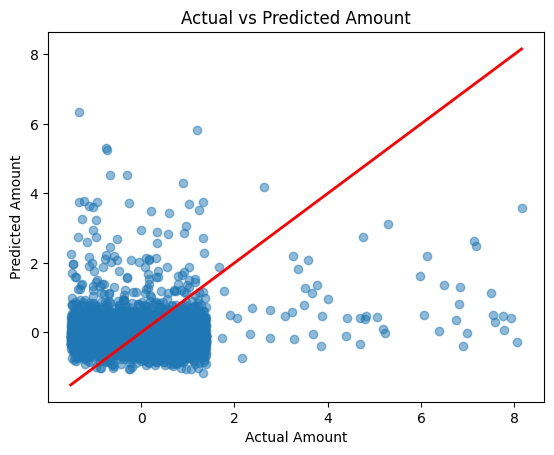

In [8]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.show()

In [9]:
# Display first few predictions and actual values
print(f'Predicted amounts: {y_pred[:5]}')
print(f'Actual amounts: {y_test[:5]}')

Predicted amounts: [-0.33881336  0.44861002  0.05322618  0.54712055 -0.29447294]
Actual amounts: [-0.44794261 -0.09417249 -1.19608976 -0.72808663  0.29119048]


In [10]:
# Inverse transform the scaled predictions and actual values
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Print the original (unscaled) predicted and actual amounts
print(f'Predicted amounts (original scale): {y_pred_original[:5]}')
print(f'Actual amounts (original scale): {y_test_original[:5]}')

Predicted amounts (original scale): [121493.         202645.85833333 161897.095      212798.48
 126062.78      ]
Actual amounts (original scale): [110246. 146706.  33141.  81374. 186422.]
